## Linear Regression on AirBNB cleaned data

In [112]:
# data structure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sma
from sklearn import metrics
import pickle
import sklearn.metrics as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [113]:
df = pd.read_csv('data/airbnbcleaned.csv')

In [114]:
df.columns

Index(['id', 'host_id', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'price_per_neighbourhood', 'total_rooms'],
      dtype='object')

removing columns that are irrelevant for this purpose

In [115]:
df = df.drop(['id','host_id'], axis=1)

In [116]:
pd.set_option('display.max_columns',50)

In [117]:
df.sample(10)

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,price_per_neighbourhood,total_rooms
71,71.554308,0,1.0,1,1,5,1,1,2,1.0,1.0,1320.467531,4,21,0,12,4.920000,0,0.210000,1311.073042,2.0
4175,71.554308,0,2.0,1,0,3,2,1,2,1.0,1.0,1500.000000,7,30,7,1,5.000000,0,0.020000,1619.909102,2.0
6857,100.000000,1,1.0,1,1,2,2,1,2,1.0,1.0,1320.467531,3,30,0,13,4.850000,1,2.640000,1205.592331,2.0
12666,100.000000,0,1.0,1,1,2,2,1,2,1.0,1.0,1320.467531,3,100,0,8,4.880000,1,0.490000,1205.592331,2.0
13967,100.000000,1,1.0,1,1,6,1,1,4,1.0,2.0,1100.000000,1,30,117,39,4.920000,0,0.420000,1308.079116,3.0
8668,50.000000,0,1.0,1,1,2,2,1,2,1.0,1.0,1185.000000,4,1125,28,3,5.000000,0,0.110000,1205.592331,2.0
1659,100.000000,0,1.0,1,1,7,1,1,2,1.5,1.0,800.000000,1,14,0,0,4.818525,1,0.733238,1197.425433,2.5
15430,60.000000,0,1.0,1,1,1,2,1,4,1.0,2.0,1500.000000,2,21,9,39,4.920000,0,0.550000,1277.845801,3.0
2563,100.000000,1,1.0,1,1,6,2,1,4,1.0,2.0,1000.000000,4,24,20,23,4.830000,0,1.190000,1308.079116,3.0
3029,71.554308,0,1.0,1,1,8,2,1,2,1.0,1.0,1320.467531,4,1125,0,1,5.000000,0,0.020000,1092.050544,2.0


In [118]:
#df = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'property_type', 'room_type'])

In [119]:
df['reviews_per_month']

0        0.733238
1        3.330000
2        3.750000
3        0.590000
4        1.210000
           ...   
16266    0.930000
16267    1.530000
16268    0.733238
16269    0.910000
16270    0.570000
Name: reviews_per_month, Length: 16271, dtype: float64

In [120]:

X = df['price'].values.reshape(-1,1)
y = df['reviews_per_month'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [121]:
y_lin_predict = lin_model.predict(X_test)
y_lin_predict

array([[0.68652825],
       [0.73472488],
       [0.70094969],
       ...,
       [0.53960887],
       [0.70094969],
       [0.68652825]])

In [122]:
a = lin_model.coef_
b = lin_model.intercept_
print(len(X))
print(len(y))


16271
16271


In [123]:
R2 = lin_model.score(X,y)
R2


0.004321737776990964

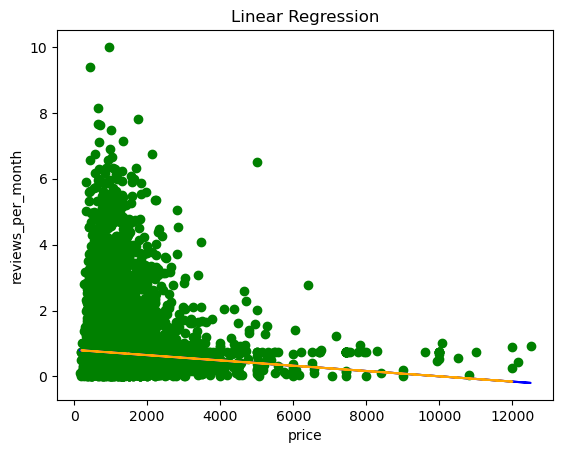

In [124]:
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_lin_predict, color='orange')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.show()

Testing with known data, predicting with unknown data

In [125]:
price_predict = lin_model.predict([[2000]])
price_predict

array([[0.6463644]])

In [126]:
new_price =10500
price_predict = lin_model.predict([[new_price]])
price_predict

array([[-0.03642114]])

In [127]:

mae = metrics.mean_absolute_error(y_test, y_lin_predict)
print(mae)

0.47246898870621096


In [128]:
mse = metrics.mean_squared_error(y_test, y_lin_predict)
print(mse)

0.6220497395042487


In [129]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_lin_predict))
print(rmse)

0.788701299291594


Calculating r^2

In [130]:

e_v = round(sm.explained_variance_score(y_test, y_lin_predict), 12)
print('Explained variance score ',e_v )

Explained variance score  0.001303644039


In [131]:
r2_score(y_test, y_lin_predict)

0.0010515310140535306

Price, Neighborhood_cleansed:

EV: 0.002972

r2: 0.002970

Price, reviews_per_month:

EV: 0.001303

r2: 0.001051



# Multiple Linear Regression

In [132]:
df.head()

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,price_per_neighbourhood,total_rooms
0,57.0,0,2.0,1,1,3,3,2,2,0.5,1.0,1320.467531,5,12,0,0,4.818525,0,0.733238,1619.909102,1.5
1,100.0,0,1.0,1,0,7,1,1,2,1.0,1.0,860.000000,2,20,25,9,4.670000,0,3.330000,1197.425433,2.0
2,57.0,0,1.0,1,1,6,1,1,3,1.0,1.0,1000.000000,2,60,107,7,4.860000,0,3.750000,1308.079116,2.0
3,48.0,0,1.0,1,1,1,2,1,2,1.0,1.0,1200.000000,2,7,178,16,5.000000,0,0.590000,1277.845801,2.0
4,79.0,1,3.0,1,1,1,2,1,5,1.0,3.0,1400.000000,2,30,118,16,4.940000,0,1.210000,1277.845801,4.0


In [133]:
X = df[['neighbourhood_cleansed', 'beds', 'bathrooms','accommodates']]
y = df['price']  

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
multi = LinearRegression()

In [136]:
multi.fit(X_train, y_train)

LinearRegression()

In [137]:
print('b0 =', multi.intercept_)
print('bi =', multi.coef_)

b0 = 618.9026574183575
bi = [-25.33394139  72.35467332 359.84938664  80.60476308]


In [138]:
list(zip(X, multi.coef_))

[('neighbourhood_cleansed', -25.333941391572058),
 ('beds', 72.35467332109417),
 ('bathrooms', 359.8493866361162),
 ('accommodates', 80.60476308290744)]

In [139]:
y_pred = multi.predict(X_test)
y_pred

array([1451.43916999, 1107.33332712, 1319.21073607, ..., 1780.39588827,
       1161.64836076, 1559.00918999])

In [140]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 345.6814535774039
Mean Squared Error: 457348.1912509091
R-squared: 0.11646043625712477


our model explains 11% of the variability in the target variable, price.

In [141]:
eV = round(sm.explained_variance_score(y_test, y_pred), 6)
print('Explained variance score ',eV )

Explained variance score  0.11699


In [142]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

676.2752333561456


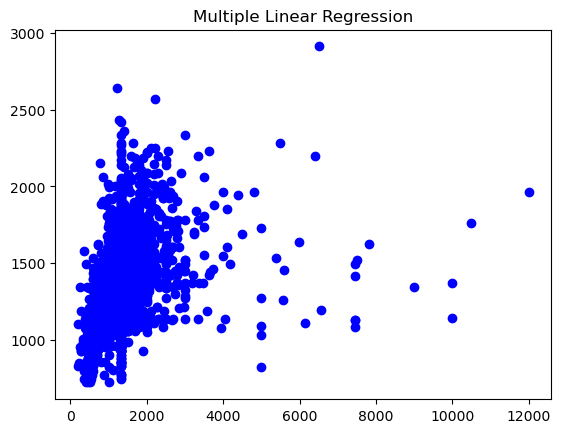

In [143]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_pred, color='blue')
plt.show()

# Polynomial Regression

In [198]:
X = df[['availability_365','accommodates','neighbourhood_cleansed', 'beds','bathrooms']]
y = df['price']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [200]:
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [205]:
poly_model = PolynomialFeatures(degree=3)
X_train_poly = poly_model.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
X_test_poly = poly_model.transform(X_test)
y_pred = pol_reg.predict(X_test_poly)

In [206]:


# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MAE:  327.0138096261761
MSE:  536192.2122329477
RMSE:  732.2514678940205
R2 Score:  0.1786207335578056
